# <center> CS F320 Foundations of Data Science <center>

## <center> Assignment <center>

***

### Group 8

#### 1. 2022A7PS0145P - Armaan Gupta
#### 2. 2022A7PS0065P - Animish Tiwari
#### 3. 2022A7PS0164P - Anjaneya Bajaj
#### 4. 2022A7PS0120P - Aryan Jain

***

#### Dataset : [Life Expectancy (WHO)](https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from ngboost import NGBRegressor
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Loading in the dataset and pre-processing

- We will first load in the dataset and take a look at the first few rows to understand the data better.
- We will then check for any missing values - there are none.
- As per the question, we will drop categorical columns - 'Country', 'Region', 'Year', 'Economy_status_Developed', 'Economy_status_Developing'.
- Eliminating outliers - any value that is more than 3 standard deviations away from the mean will be considered an outlier and will be removed.
- Making plots to visualize the data distributions.
- Splitting the data into training and testing sets.
- Applying PCA, taking 9 principal components to account for >95% variance.
- To also use the same data for the classification task, we modify the target life expectancy into 3 classes - 'Low' (0), 'Medium' (1), 'High' (2).

In [2]:
df = pd.read_csv('./Life-Expectancy-Data-Updated.csv')
df

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


In [3]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [5]:
# Dropping categorical columns - country, region, year, economic_status

df.drop(['Country', 'Region', 'Year', 'Economy_status_Developed', 'Economy_status_Developing'], axis=1, inplace=True)

In [6]:
# Removing outliers in all columns

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [7]:
df.describe()

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy
count,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000
mean,27.209637,37.500685,177.757278,4.892483,86.548387,79.337903,25.189435,88.450000,88.375000,0.542298,10944.108468,22.146359,4.441048,4.430081,7.795565,69.949677
std,24.411145,38.547215,93.440631,3.970611,13.255460,16.862073,2.079111,12.482078,12.619437,1.073042,14190.997319,41.422107,3.642348,3.671652,3.090720,8.262200
min,1.800000,2.300000,50.574500,0.000000,38.000000,22.000000,19.900000,42.000000,40.000000,0.010000,286.000000,0.080000,0.100000,0.100000,1.300000,44.400000
25%,7.900000,9.400000,105.977000,1.240000,81.750000,64.000000,23.600000,84.000000,84.000000,0.080000,1574.500000,2.362500,1.600000,1.600000,5.300000,65.000000
50%,18.100000,21.100000,157.679000,4.110000,91.000000,83.000000,25.700000,94.000000,94.000000,0.150000,4530.000000,7.540000,3.200000,3.200000,8.000000,72.000000
75%,41.425000,55.400000,228.294375,8.060000,96.000000,94.000000,26.500000,97.000000,97.000000,0.400000,13165.000000,21.757500,6.800000,6.700000,10.400000,75.600000
max,112.400000,174.900000,532.874500,16.720000,99.000000,99.000000,31.600000,99.000000,99.000000,7.970000,62012.000000,320.740000,17.900000,18.300000,14.100000,83.800000


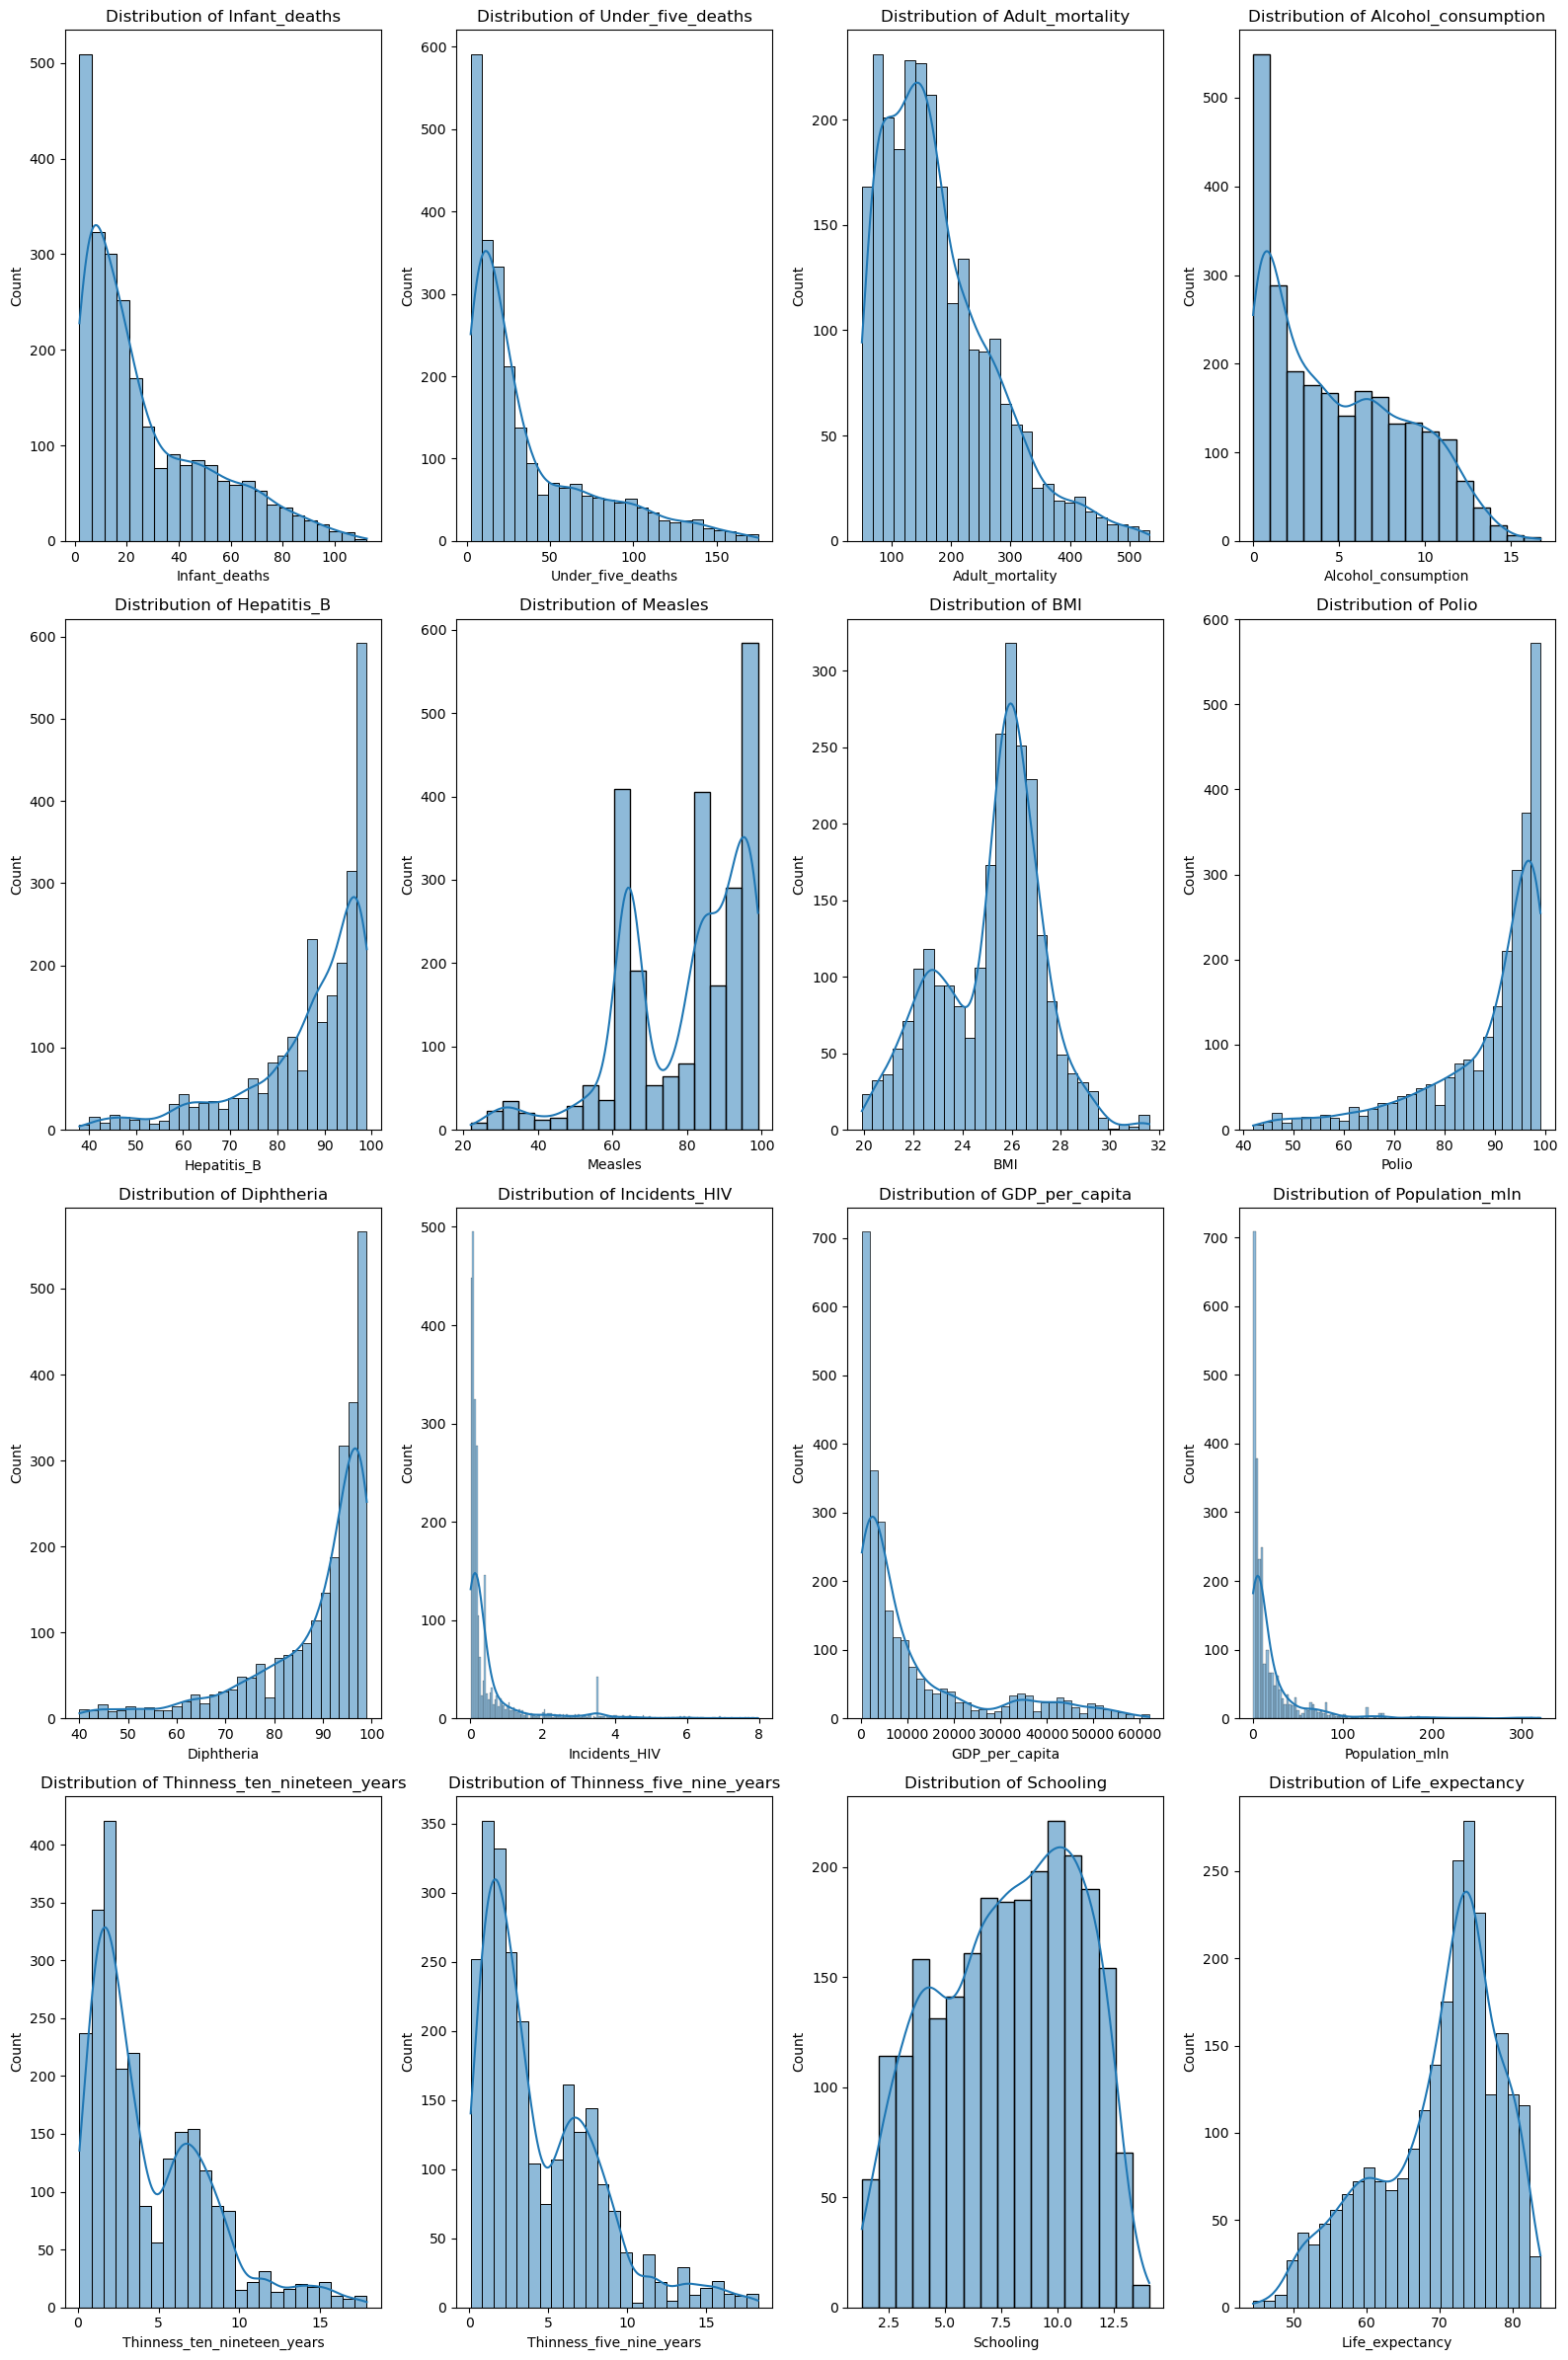

In [8]:
# Plotting the distribution of all numeric columns

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

num_plots = len(numeric_columns)
num_cols = 4  
num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0) 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6*num_rows))
axes = axes.flatten()  

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [9]:
# Splitting the data into features and target

X = df.drop('Life_expectancy', axis=1)
y = df['Life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Scaling and applying PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# pca = PCA(n_components=3)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

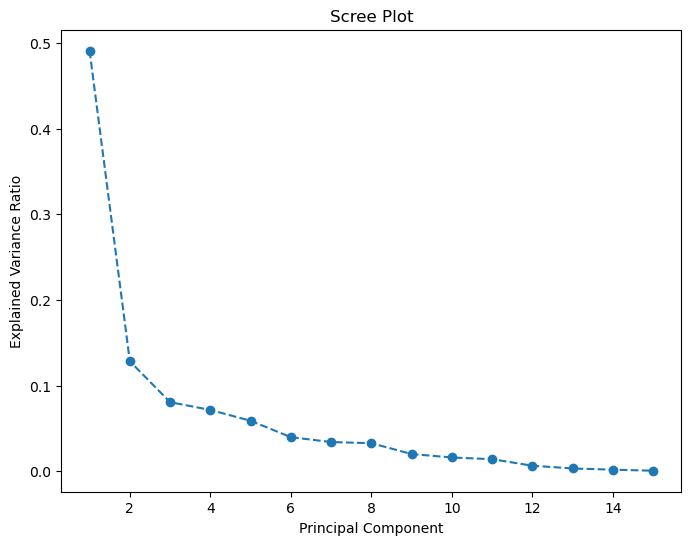

In [11]:
# Explained variance ratio

explained_variance = pca.explained_variance_ratio_

# Plotting scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

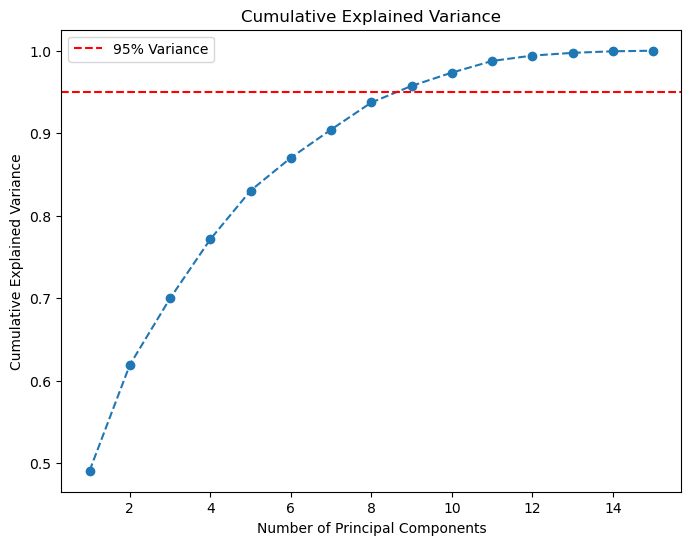

In [12]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.show()


In [13]:
# Based on plots, extracting 9 principal components

X_train_pca = X_train_pca[:, :9]
X_test_pca = X_test_pca[:, :9]

In [14]:
# Creating target variable for classification

bins = [40, 65, 75, 90]
labels = [0,1,2]

y_train_class = pd.cut(y_train, bins=bins, labels=labels)
y_test_class = pd.cut(y_test, bins=bins, labels=labels)

## Regression Models

Applying various regression models and calculating RMSE and MAE for each model. Models applied :
- Linear Regression
- Random Forests
- Extra Random Trees
- AdaBoost
- XGBoost
- NGBoost
- Neural Network

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror'),
    "NGBoost": NGBRegressor()
}

In [16]:
# Function to train and evaluate regression models

def regression_models(X_train, X_test, y_train, y_test, models):
    model_results = []
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        
        model_results.append({"Model": model_name, "RMSE": rmse, "MAE": mae})
    
    results_df = pd.DataFrame(model_results)
    return results_df

In [17]:
# Training on original dataset

results_original = regression_models(X_train, X_test, y_train, y_test, models)

[iter 0] loss=3.5200 val_loss=0.0000 scale=1.0000 norm=6.6225
[iter 100] loss=2.4747 val_loss=0.0000 scale=2.0000 norm=3.2082
[iter 200] loss=1.6856 val_loss=0.0000 scale=2.0000 norm=1.8454
[iter 300] loss=1.2115 val_loss=0.0000 scale=2.0000 norm=1.5878
[iter 400] loss=1.0191 val_loss=0.0000 scale=2.0000 norm=1.5048


In [18]:
# Train on PCA dataset

results_pca = regression_models(X_train_pca, X_test_pca, y_train, y_test, models)

[iter 0] loss=3.5200 val_loss=0.0000 scale=1.0000 norm=6.6225
[iter 100] loss=2.5957 val_loss=0.0000 scale=2.0000 norm=4.2528
[iter 200] loss=1.9757 val_loss=0.0000 scale=2.0000 norm=2.7431
[iter 300] loss=1.6653 val_loss=0.0000 scale=2.0000 norm=2.3791
[iter 400] loss=1.5467 val_loss=0.0000 scale=1.0000 norm=1.1228


In [19]:
print("Regression Models Evaluation on Original Dataset\n")
print(tabulate(results_original, headers=["Model", "RMSE", "MAE"], tablefmt="grid"))

Regression Models Evaluation on Original Dataset

+----+-------------------+----------+----------+
|    | Model             |     RMSE |      MAE |
+====+===================+==========+==========+
|  0 | Linear Regression | 1.31802  | 1.04314  |
+----+-------------------+----------+----------+
|  1 | Random Forest     | 0.490772 | 0.360032 |
+----+-------------------+----------+----------+
|  2 | Extra Trees       | 0.352832 | 0.237351 |
+----+-------------------+----------+----------+
|  3 | AdaBoost          | 1.3455   | 1.10238  |
+----+-------------------+----------+----------+
|  4 | XGBoost           | 0.513028 | 0.366246 |
+----+-------------------+----------+----------+
|  5 | NGBoost           | 0.827804 | 0.64088  |
+----+-------------------+----------+----------+


In [20]:
print("Regresssion Models Evaluation on PCA Dataset\n")
print(tabulate(results_pca, headers=["Model", "RMSE", "MAE"], tablefmt="grid"))

Regresssion Models Evaluation on PCA Dataset

+----+-------------------+----------+----------+
|    | Model             |     RMSE |      MAE |
+====+===================+==========+==========+
|  0 | Linear Regression | 1.9795   | 1.587    |
+----+-------------------+----------+----------+
|  1 | Random Forest     | 1.06907  | 0.72579  |
+----+-------------------+----------+----------+
|  2 | Extra Trees       | 0.834909 | 0.549705 |
+----+-------------------+----------+----------+
|  3 | AdaBoost          | 2.15021  | 1.76814  |
+----+-------------------+----------+----------+
|  4 | XGBoost           | 0.945328 | 0.676679 |
+----+-------------------+----------+----------+
|  5 | NGBoost           | 1.40964  | 1.09712  |
+----+-------------------+----------+----------+


## Classification Models

Applying various classification models and calculating accuracy, precision, recall and F1-score for each model. Models applied :
- Logistic Regression
- Naive Bayes
- KNN
- Linear SVM
- Kernel SVM
- Decision Trees
- 2 Layer Fully Connected Neural Network

In [21]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(kernel="linear", random_state=42),
    "Kernel SVM": SVC(kernel="rbf", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [22]:
# Function to train and evaluate classification models

def classification_models(X_train, X_test, y_train, y_test, models):
    model_results = []
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted")
        recall = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")
    
        model_results.append([model_name, accuracy, precision, recall, f1])

    results_df = pd.DataFrame(model_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
    return results_df

In [23]:
results_original = classification_models(X_train, X_test, y_train_class, y_test_class, models)

/Users/anjaneyabajaj/anaconda3/envs/ML_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
results_pca = classification_models(X_train_pca, X_test_pca, y_train_class, y_test_class, models)

In [25]:
# Neural Network

class NN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
# Train function
def train(model, X_train, y_train, criterion, optimizer, num_epochs=100):
    model.train() 
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Calculate predictions and accuracy
        _, predicted = torch.max(outputs, 1)  # Get class predictions
        accuracy = (predicted == y_train).float().mean().item() * 100
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")

# Test function
def test(model, X_test, y_test, results):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        y_pred = model(X_test).argmax(dim=1).numpy()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    results.loc[len(results)] = ["Neural Network", accuracy, precision, recall, f1]
    print("Accuracy: {:.2f}%, Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(accuracy*100, precision, recall, f1))

In [26]:
# Train and test the model on original dataset

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_class.to_numpy(), dtype=torch.long)
y_test_tensor = torch.tensor(y_test_class.to_numpy(), dtype=torch.long)

input_size = X_train.shape[1]
hidden_size = 64
output_size = 3
model = NN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train(model, X_train_tensor, y_train_tensor, criterion, optimizer, num_epochs=1000)
test(model, X_test_tensor, y_test_tensor, results_original)

Epoch [10/1000], Loss: 32.8876, Accuracy: 47.73%
Epoch [20/1000], Loss: 11.1697, Accuracy: 57.01%
Epoch [30/1000], Loss: 3.8814, Accuracy: 62.60%
Epoch [40/1000], Loss: 8.3259, Accuracy: 69.46%
Epoch [50/1000], Loss: 10.0214, Accuracy: 61.59%
Epoch [60/1000], Loss: 6.6623, Accuracy: 69.61%
Epoch [70/1000], Loss: 3.0439, Accuracy: 73.64%
Epoch [80/1000], Loss: 4.5844, Accuracy: 73.84%
Epoch [90/1000], Loss: 3.5982, Accuracy: 78.63%
Epoch [100/1000], Loss: 2.6711, Accuracy: 74.80%
Epoch [110/1000], Loss: 1.8173, Accuracy: 76.46%
Epoch [120/1000], Loss: 1.1863, Accuracy: 81.30%
Epoch [130/1000], Loss: 0.6539, Accuracy: 81.45%
Epoch [140/1000], Loss: 3.7424, Accuracy: 64.77%
Epoch [150/1000], Loss: 0.6480, Accuracy: 84.68%
Epoch [160/1000], Loss: 1.5692, Accuracy: 81.20%
Epoch [170/1000], Loss: 8.5133, Accuracy: 66.18%
Epoch [180/1000], Loss: 1.5263, Accuracy: 80.39%
Epoch [190/1000], Loss: 4.5668, Accuracy: 79.54%
Epoch [200/1000], Loss: 2.2846, Accuracy: 83.32%
Epoch [210/1000], Loss: 1.

In [27]:
# Train and test the model on PCA dataset

X_train_tensor = torch.tensor(X_train_pca, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_class.to_numpy(), dtype=torch.long)
y_test_tensor = torch.tensor(y_test_class.to_numpy(), dtype=torch.long)

input_size = X_train_pca.shape[1]
hidden_size = 64
output_size = 3
model = NN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train(model, X_train_tensor, y_train_tensor, criterion, optimizer, num_epochs=100)
test(model, X_test_tensor, y_test_tensor, results_pca)

Epoch [10/100], Loss: 0.9552, Accuracy: 63.81%
Epoch [20/100], Loss: 0.8338, Accuracy: 76.92%
Epoch [30/100], Loss: 0.7364, Accuracy: 80.90%
Epoch [40/100], Loss: 0.6579, Accuracy: 81.60%
Epoch [50/100], Loss: 0.5947, Accuracy: 82.31%
Epoch [60/100], Loss: 0.5439, Accuracy: 83.11%
Epoch [70/100], Loss: 0.5034, Accuracy: 83.42%
Epoch [80/100], Loss: 0.4709, Accuracy: 83.77%
Epoch [90/100], Loss: 0.4446, Accuracy: 84.22%
Epoch [100/100], Loss: 0.4228, Accuracy: 84.43%
Accuracy: 85.89%, Precision: 0.87, Recall: 0.86, F1-Score: 0.85


In [28]:
print("Classification Models Evaluation on Original Dataset\n")
print(tabulate(results_original, headers=["Model", "Accuracy", "Precision", "Recall", "F1-Score"], tablefmt="grid"))

Classification Models Evaluation on Original Dataset

+----+---------------------+------------+-------------+----------+------------+
|    | Model               |   Accuracy |   Precision |   Recall |   F1-Score |
+====+=====================+============+=============+==========+============+
|  0 | Logistic Regression |   0.935484 |    0.935257 | 0.935484 |   0.935343 |
+----+---------------------+------------+-------------+----------+------------+
|  1 | Naive Bayes         |   0.864919 |    0.868099 | 0.864919 |   0.863405 |
+----+---------------------+------------+-------------+----------+------------+
|  2 | K-Nearest Neighbors |   0.850806 |    0.852678 | 0.850806 |   0.85157  |
+----+---------------------+------------+-------------+----------+------------+
|  3 | Linear SVM          |   0.929435 |    0.932095 | 0.929435 |   0.929683 |
+----+---------------------+------------+-------------+----------+------------+
|  4 | Kernel SVM          |   0.754032 |    0.755882 | 0.754032 |

In [29]:
print("Classification Models Evaluation on PCA Dataset\n")
print(tabulate(results_pca, headers=["Model", "Accuracy", "Precision", "Recall", "F1-Score"], tablefmt="grid"))

Classification Models Evaluation on PCA Dataset

+----+---------------------+------------+-------------+----------+------------+
|    | Model               |   Accuracy |   Precision |   Recall |   F1-Score |
+====+=====================+============+=============+==========+============+
|  0 | Logistic Regression |   0.91129  |    0.911451 | 0.91129  |   0.91135  |
+----+---------------------+------------+-------------+----------+------------+
|  1 | Naive Bayes         |   0.842742 |    0.84911  | 0.842742 |   0.84119  |
+----+---------------------+------------+-------------+----------+------------+
|  2 | K-Nearest Neighbors |   0.943548 |    0.94342  | 0.943548 |   0.943408 |
+----+---------------------+------------+-------------+----------+------------+
|  3 | Linear SVM          |   0.905242 |    0.905504 | 0.905242 |   0.905269 |
+----+---------------------+------------+-------------+----------+------------+
|  4 | Kernel SVM          |   0.941532 |    0.941501 | 0.941532 |   0.